# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

## Inicialização

In [108]:
import pandas as pd
import matplotlib as plt
from scipy import stats as st
import seaborn as sns

## Carregar dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar os dados

## Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprimir uma amostra de dados para os planos
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Possui 8 colunas e 2 linhas com os 2 planos apresentados, Surf e Ultimate. Não possui dados ausentes e nem duplicados. Em relação aos tipos acredito que as colunas 'usd_monthly_pay' e 'usd_per_gb' deveriam ser do tipo float. 

## Corrigir dados

In [5]:
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype('float')
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float')

In [6]:
#Conferindo se funcionou
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


## Enriqueça os dados

## Usuários

In [7]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprimir uma amostra de dados para usuários
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [9]:
users.duplicated().sum()

0

 São 8 colunas e 500 linhas.
- A coluna 'churn_date' possui muitos dados ausentes.
- Não possui dados duplicados.
- A respeito do tipo de dados, a coluna 'reg_date' e 'churn_date' deveria ser do tipo datetime.

### Corrigir dados

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [11]:
#Conferindo se funcionou
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer Dados

In [12]:
users['active_user'] = users['churn_date'].isna().astype('int')

In [13]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active_user
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,1


## Chamadas

In [14]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprimir uma amostra de dados para chamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [16]:
calls.duplicated().sum()

0

São 4 colunas e 137735 linhas.
- Não possui valores ausentes nem duplicados.
- A coluna 'call_date' deve ser do tipo datetime

### Corrigir dados

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Corrigi a coluna 'call_date' para o tipo datetime.

### Enriquecer dados

In [19]:
#Adicionando uma coluna de mês
calls['month'] = calls['call_date'].dt.month

In [20]:
#Arredondar os minutos para cima
calls['duration'] = calls['duration'].round()

In [21]:
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,14.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,4.0,12


- Adicionei uma coluna de mês para facilitar futuras análises.
- Arredindei a coluna 'duration' para minutos completos. pois cada chamada individual é arredondada para cima: mesmo se uma chamada tenha durado apenas um segundo, será contado como um minuto.

## Mensagens

In [22]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Imprima uma amostra dos dados para as mensagens
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [24]:
#Conferindo se há dados duplicados
messages.duplicated().sum()

0

São 3 colunas e 76051 linhas.
- Não possui valores ausentes nem duplicados.
- A coluna 'message_date' deve ser do tipo datetime.

### Corrigir dados

In [25]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [26]:
#Conferindo se funcionou
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Corrigi a coluna 'message_date' para o tipo datetime.

### Enriquecer dados

In [27]:
#Adicionando uma coluna de mês
messages['month'] = messages['message_date'].dt.month

In [28]:
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


Adicionei uma coluna de mês para facilitar futuras análises.

## Internet

In [29]:
# Imprime as informações gerais/resumidas sobre o DataFrame da Internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
# Imprime uma amostra de dados para o tráfego da Internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [31]:
internet.duplicated().sum()

0

São 4 colunas e 104825 linhas.
- Não possui valores ausentes nem valores duplicados
- A coluna 'session_date' deve ser do tipo datetime

### Corrigir dados

In [32]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [33]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Corrigi a coluna 'session_date' para o tipo datetime.

### Enriquecer dados

In [34]:
#Adicionando uma coluna de mês
internet['month'] = internet['session_date'].dt.month

In [35]:
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


Adicionei uma coluna de mês para facilitar futuras análises.

## Condições do plano de estudos

In [36]:
# Imprime as condições do plano e certifique-se de que estão claras para você
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


In [37]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
call_per_user_month = calls.groupby(['user_id', 'month'])['duration'].count()
print(call_per_user_month)

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: duration, Length: 2258, dtype: int64


Aqui agrupei o dataframe 'calls' (chamadas), contando a coluna 'duration' para saber o número de chamadas feitas por cada usuário por mês.

In [38]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
minutes_per_user_month = calls.groupby(['user_id', 'month'])['duration'].sum()
print(minutes_per_user_month)

user_id  month
1000     12       117.0
1001     8        173.0
         9        297.0
         10       374.0
         11       404.0
                  ...  
1498     12       326.0
1499     9        328.0
         10       361.0
         11       287.0
         12       463.0
Name: duration, Length: 2258, dtype: float64


Aqui agrupei o dataframe 'calls' (chamadas), somando a coluna 'duration' para saber a quantidade de minutos gastos por cada usuário por mês.

In [39]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
message_per_user_month = messages.groupby(['user_id', 'month'])['id'].count()
print(message_per_user_month)

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64


Aqui agrupei o dataframe 'messages' (mensagens), contando a coluna 'id' para saber o número de mensagens enviadas por cada usuário por mês.

In [40]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet_per_user_month = internet.groupby(['user_id', 'month'])['mb_used'].sum()
print(internet_per_user_month)

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64


Aqui agrupei o dataframe 'internet', somando a coluna 'mb_used' para saber o o volume de tráfego usado por cada usuário por mês.

In [41]:
# Junte os dados de chamadas, minutos, mensagens, internet com base em user_id e mês
dados = pd.merge(call_per_user_month, internet_per_user_month, right_index=True, left_index=True)
dados2 = pd.merge(minutes_per_user_month, message_per_user_month, right_index=True, left_index=True)
dados_gerais = pd.merge(dados, dados2, right_index=True, left_index=True)
dados_gerais = dados_gerais.rename(columns={'duration_x': 'n_calls',
                                   'mb_used': 'internet',
                                   'duration_y': 'minutes',
                                   'id': 'messages'})
dados_gerais.head()

n_calls  internet  minutes  messages
user_id month                                      
1000    12          16   1901.47    117.0        11
1001    8           27   6919.15    173.0        30
        9           49  13314.82    297.0        44
        10          65  22330.49    374.0        53
        11          64  18504.30    404.0        36

Juntei todos os dados agrupados em um único dataframe para fazer a análise.

In [42]:
# Adicione as informações do plano
users2 = users[['user_id', 'plan']]
dados_gerais = dados_gerais.reset_index().merge(users2, on='user_id')
dados_gerais.head()

,user_id,month,n_calls,internet,minutes,messages,plan
0,1000,12,16,1901.47,117.0,11,ultimate
1,1001,8,27,6919.15,173.0,30,surf
2,1001,9,49,13314.82,297.0,44,surf
3,1001,10,65,22330.49,374.0,53,surf
4,1001,11,64,18504.30,404.0,36,surf


Adicionei as informações do plano de cada usuário.

In [43]:
# Transformando os megabytes em gygabytes
dados_gerais['internet'] = dados_gerais['internet'] / 1000
dados_gerais.head()

,user_id,month,n_calls,internet,minutes,messages,plan
0,1000,12,16,1.90147,117.0,11,ultimate
1,1001,8,27,6.91915,173.0,30,surf
2,1001,9,49,13.31482,297.0,44,surf
3,1001,10,65,22.33049,374.0,53,surf
4,1001,11,64,18.50430,404.0,36,surf


In [44]:
#Arredondando GB
dados_gerais['internet'] = dados_gerais['internet'].round()
dados_gerais.head()

,user_id,month,n_calls,internet,minutes,messages,plan
0,1000,12,16,2.0,117.0,11,ultimate
1,1001,8,27,7.0,173.0,30,surf
2,1001,9,49,13.0,297.0,44,surf
3,1001,10,65,22.0,374.0,53,surf
4,1001,11,64,19.0,404.0,36,surf


Transformei MB em GB e depois arredondei os GB, pois o total do mês é arredondado para cima. Se alguém usar 1025 megabytes esse mês, eles serão cobrados por 2 gigabytes.

In [45]:
#Calculando a receita para cada usuário
def compute_stuff(row):
    """
        Returns $$ for each client
    """
    plan = row['plan']
    minutes = row['minutes']
    messages = row['messages']
    internet = row['internet']
    
    if plan == 'ultimate':
        valor = 70
        if minutes > 3000: 
            valor += (minutes-3000) * 0.1 # adiciona o valor que deve ser pago por cada minuto adicional
        if messages > 1000:
            valor += (messages-1000) * 0.1 
        if internet > 30:
            valor += (internet-30) * 7
    if plan == 'surf':
        valor = 20
        if minutes > 500:
            valor += (minutes-500) * 0.3 # adiciona o valor que deve ser pago por cada minuto adicional
        if messages > 50:
            valor += (messages-50) * 0.3 
        if internet > 15:
            valor += (internet-15) * 10
        
    return valor # retorna o valor que deve ser pago por esse cliente

dados_gerais['usd'] = dados_gerais.apply(compute_stuff, axis=1)

Calculei a receita de cada usuário por mês de acordo com os valores de cada plano e os limites disponíveis que foram ultrapassados.

In [46]:
dados_gerais.head()

,user_id,month,n_calls,internet,minutes,messages,plan,usd
0,1000,12,16,2.0,117.0,11,ultimate,70.0
1,1001,8,27,7.0,173.0,30,surf,20.0
2,1001,9,49,13.0,297.0,44,surf,20.0
3,1001,10,65,22.0,374.0,53,surf,90.9
4,1001,11,64,19.0,404.0,36,surf,60.0


In [47]:
# Conferindo se está tudo certo
dados_gerais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   1759 non-null   int64  
 1   month     1759 non-null   int64  
 2   n_calls   1759 non-null   int64  
 3   internet  1759 non-null   float64
 4   minutes   1759 non-null   float64
 5   messages  1759 non-null   int64  
 6   plan      1759 non-null   object 
 7   usd       1759 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 123.7+ KB


## Estudar o comportamento do usuário

In [48]:
#Média(mean), desvio padrão(std), variância (std²)
dados_gerais.describe()

,user_id,month,n_calls,internet,minutes,messages,usd
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000
mean,1244.966458,9.262649,62.226265,16.843661,419.602047,41.782831,75.401308
std,139.290562,2.441891,32.838072,7.726850,226.795843,32.673455,59.606256
min,1000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,20.000000
25%,1126.000000,8.000000,40.000000,13.000000,262.500000,17.000000,38.900000
50%,1246.000000,10.000000,61.000000,17.000000,409.000000,34.000000,70.000000
75%,1362.000000,11.000000,81.000000,21.000000,552.000000,59.000000,80.000000
max,1497.000000,12.000000,205.000000,71.000000,1433.000000,266.000000,766.300000


In [49]:
dados_gerais['plan'].mode()

0    surf
dtype: object

In [50]:
print(dados_gerais['usd'].mean())
dados_gerais['usd'].median()


75.40130756111427


70.0

A média e a mediana são próximas, sendo maior que 70 (plano ultimate), porém o plano mais usado é o surf.

In [51]:
print(dados_gerais['internet'].mean())
dados_gerais['internet'].median()

16.843661171119955


17.0

A média e a mediana são próximas e são maiores que 15GB de internet que o plano surf oferece.

In [52]:
print(dados_gerais['minutes'].mean())
dados_gerais['minutes'].median()

419.60204661739624


409.0

In [53]:
print(dados_gerais['messages'].mean())
dados_gerais['messages'].median()

41.78283115406481


34.0

A média é maior do que a mediana, excerto da internet, então os dados têm assimetria positiva, porém não é uma grande diferença, então podemos analisar os dados pela média.

Analisando pela média:
A média de uso de internet é maior que 15GB, sendo que o plano mais usado é o surf (acredito que por ser mais barato), que oferece no máximo 15 GB. Em relação à média dos minutos e das mensagens está dentro do que o plano oferece. Porém a média dos valores é maior que 75, o que acredito que significa que mesmo o plano surf sendo o mais usado, os usuários acabam pagando mais do que o valor do plano ultimate por ultrapassar o que o plano oferece; se assim for, compensava os usuários pagarem pelo plano ultimate que oferece melhores condições de acordo com o uso dos clientes.

### Chamadas

In [54]:
# Compare a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.
df_minutes = dados_gerais.pivot_table(index=['plan', 'month'], values='minutes')
print(df_minutes)

                   minutes
plan     month            
surf     1      279.000000
         2      313.800000
         3      324.937500
         4      346.428571
         5      418.377358
         6      400.985714
         7      426.393258
         8      404.168067
         9      401.843537
         10     417.718232
         11     418.743119
         12     467.191057
ultimate 1      188.000000
         2      458.000000
         3      389.285714
         4      302.562500
         5      387.142857
         6      349.864865
         7      416.212766
         8      411.157895
         9      412.915493
         10     438.443182
         11     438.872549
         12     436.552000


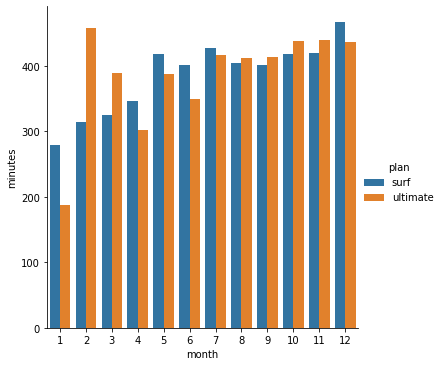

In [55]:
#df_minutes['minutes'].plot(kind='bar', figsize=(12,6), grid=True)
df_expl = df_minutes['minutes'].reset_index()
sns.catplot(x='month', y='minutes', hue='plan', data=df_expl, kind='bar')

O comportamento dos usuários dos dois planos são parecidos, mas aparentemente os usuários do plano surf são os que tem a maior média de uso dos minutos em geral.

<AxesSubplot:ylabel='Frequency'>

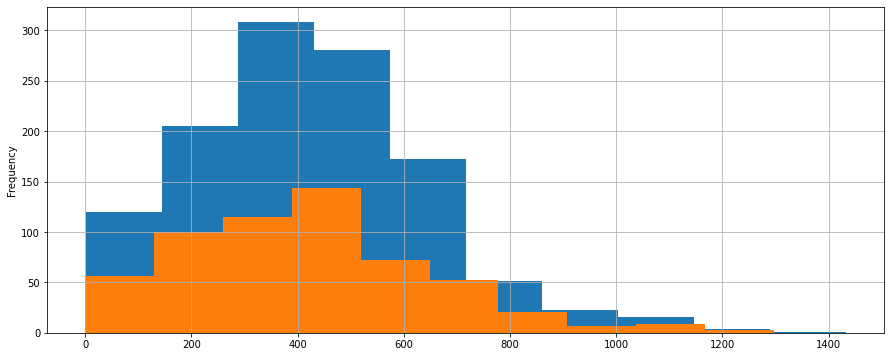

In [56]:
# Compare o número de minutos que os usuários de cada plano requerem a cada mês. Construa um histograma.
df_minutes_surf = dados_gerais.query('plan == "surf"')
df_minutes_ultimate = dados_gerais.query('plan == "ultimate"')
df_minutes_surf['minutes'].plot(kind='hist', figsize=(15,6), grid=True)
df_minutes_ultimate['minutes'].plot(kind='hist', figsize=(15,6), grid=True)

Os usuários dos planos aparentam ter comportamentos parecidos/proporcionais, porém os usuários do plano ultimate não ultrapassam 1300 minutos e tem disponível 3000 minutos; muitos usuários do plano surf ultrapassam seu limite de 500 minutos, alguns chegando a ultrapassar os 1400 minutos.

In [57]:
dados_gerais.query('minutes > 500 and plan == "surf"').count()

user_id     386
month       386
n_calls     386
internet    386
minutes     386
messages    386
plan        386
usd         386
dtype: int64

In [58]:
dados_gerais.query('plan == "surf"').count()

user_id     1180
month       1180
n_calls     1180
internet    1180
minutes     1180
messages    1180
plan        1180
usd         1180
dtype: int64

In [59]:
dados_gerais.query('minutes > 3000 and plan == "ultimate"').count()

user_id     0
month       0
n_calls     0
internet    0
minutes     0
messages    0
plan        0
usd         0
dtype: int64

In [60]:
dados_gerais.query('plan == "ultimate"').count()

user_id     579
month       579
n_calls     579
internet    579
minutes     579
messages    579
plan        579
usd         579
dtype: int64

Os usuários do plano ultimate são 579, e nenhum ultrapassou o limite de 3000 minutos.

Os usuários do plano surf são 1180 e 386 ultrapassaram o limite de 500 minutos.

In [61]:
# Calcule a média e a variação da duração mensal das chamadas
print(df_minutes.query('plan == "surf"').mean())
df_minutes.query('plan == "ultimate"').mean()

minutes    384.965535
dtype: float64


minutes    385.750818
dtype: float64

<AxesSubplot:>

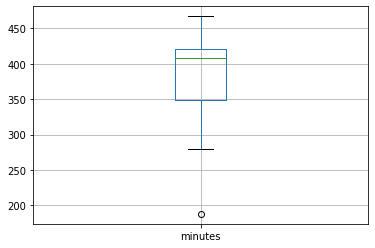

In [62]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
df_minutes.boxplot()

Pelos cálculos das médias para cada plano e pelos gráficos, vemos que o comportamento dos usuários em relação aos minutos é parecido, com médias praticamente iguais; mas parte dos usuários do plano surf ultrapassam seus limites disponíveis.

### Mensagens

In [63]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
df_messages = dados_gerais.pivot_table(index=['plan', 'month'], values='messages')
print(df_messages)

                 messages
plan     month           
surf     1      21.000000
         2      21.600000
         3      21.937500
         4      24.685714
         5      33.547170
         6      32.742857
         7      34.786517
         8      37.302521
         9      38.585034
         10     41.475138
         11     40.087156
         12     47.686992
ultimate 1      20.666667
         2      27.800000
         3      34.714286
         4      28.937500
         5      44.333333
         6      37.135135
         7      41.212766
         8      47.929825
         9      45.901408
         10     47.488636
         11     47.656863
         12     53.744000


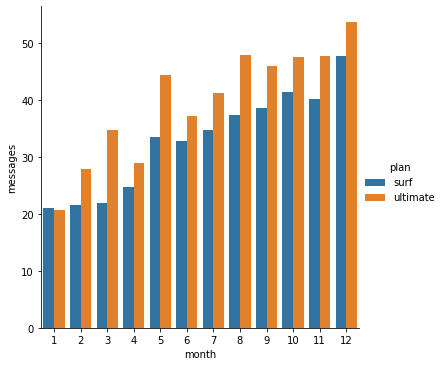

In [64]:
df_expl = df_messages['messages'].reset_index()
sns.catplot(x='month', y='messages', hue='plan', data=df_expl, kind='bar')

O comportamento dos usuários dos dois planos são proporcionais, conforme avança o ano, mais mensagens são enviadas pelos clientes. Os usuários do plano ultimate tendem a enviar mais mensagens.

<AxesSubplot:ylabel='Frequency'>

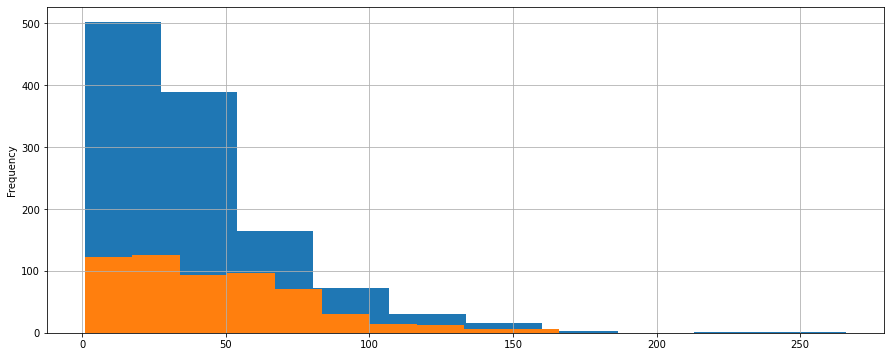

In [65]:
df_messages_surf = dados_gerais.query('plan == "surf"')
df_messages_ultimate = dados_gerais.query('plan == "ultimate"')
df_messages_surf['messages'].plot(kind='hist', figsize=(15,6), grid=True)
df_messages_ultimate['messages'].plot(kind='hist', figsize=(15,6), grid=True)

Os usuários dos planos aparentam ter comportamentos parecidos/proporcionais, porém os usuários do plano ultimate não ultrapassam 200 mensagens e tem disponível 1000 mensagens; muitos usuários do plano surf ultrapassam seu limite de 50 mensagens, alguns chegando a ultrapassar os 250 mensagens.

In [66]:
dados_gerais.query('messages > 50 and plan == "surf"').count()

user_id     318
month       318
n_calls     318
internet    318
minutes     318
messages    318
plan        318
usd         318
dtype: int64

In [67]:
 dados_gerais.query('plan == "surf"').count()

user_id     1180
month       1180
n_calls     1180
internet    1180
minutes     1180
messages    1180
plan        1180
usd         1180
dtype: int64

In [68]:
dados_gerais.query('messages > 1000 and plan == "ultimate"').count()

user_id     0
month       0
n_calls     0
internet    0
minutes     0
messages    0
plan        0
usd         0
dtype: int64

In [69]:
dados_gerais.query('plan == "ultimate"').count()

user_id     579
month       579
n_calls     579
internet    579
minutes     579
messages    579
plan        579
usd         579
dtype: int64

Com as mensagens ocorre o mesmo que os minutos:

Os usuários do plano ultimate são 579, e nenhum ultrapassou o limite de 1000 mensagens.

Os usuários do plano surf são 1180 e 318 ultrapassaram o limite de 50 mensagens.

In [70]:
print(df_messages.query('plan == "surf"').mean())
df_messages.query('plan == "ultimate"').mean()

messages    32.95305
dtype: float64


messages    39.793368
dtype: float64

<AxesSubplot:>

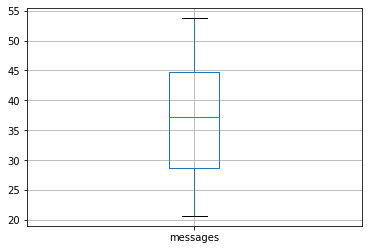

In [71]:
df_messages.boxplot()

Pelos cálculos das médias para cada plano e pelos gráficos, vemos que o comportamento dos usuários em relação as mensagens é proporcional, com médias próximas. Conforme avança o ano, mais mensagens são enviadas pelos clientes. Os usuários do plano ultimate tendem a enviar mais mensagens.

### Internet

In [72]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
df_internet = dados_gerais.pivot_table(index=['plan', 'month'], values='internet')
print(df_internet)

                 internet
plan     month           
surf     1       8.000000
         2       9.400000
         3      12.375000
         4      11.885714
         5      14.811321
         6      15.614286
         7      16.741573
         8      17.184874
         9      16.482993
         10     17.447514
         11     16.293578
         12     17.975610
ultimate 1       7.000000
         2      17.400000
         3      23.857143
         4      14.500000
         5      16.952381
         6      15.432432
         7      16.531915
         8      17.912281
         9      16.394366
         10     17.568182
         11     17.313725
         12     18.264000


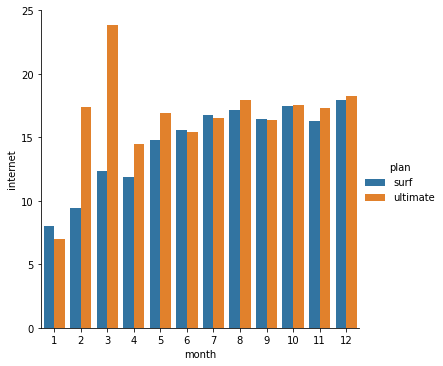

In [73]:
df_expl = df_internet['internet'].reset_index()
sns.catplot(x='month', y='internet', hue='plan', data=df_expl, kind='bar')

O comportamento dos usuários dos dois planos são parecidos, havendo uma diferença maior nos meses de fevereiro e março. 

<AxesSubplot:ylabel='Frequency'>

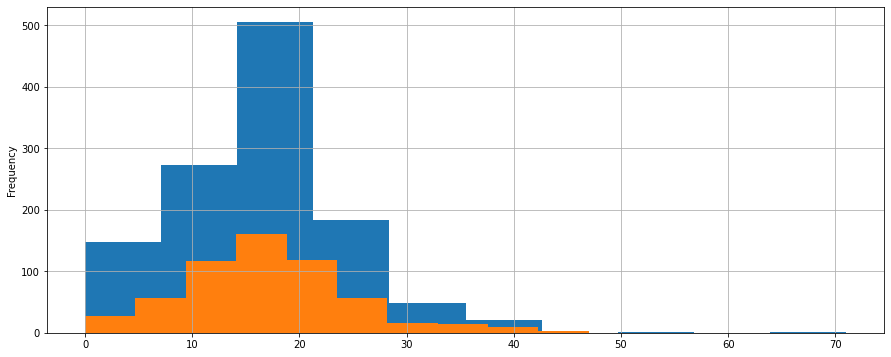

In [74]:
df_internet_surf = dados_gerais.query('plan == "surf"')
df_internet_ultimate = dados_gerais.query('plan == "ultimate"')
df_internet_surf['internet'].plot(kind='hist', figsize=(15,6), grid=True)
df_internet_ultimate['internet'].plot(kind='hist', figsize=(15,6), grid=True)

Como nos outros parâmetros, os usuários dos planos aparentam ter comportamentos parecidos/proporcionais. Alguns usuários do plano ultimate ultrapassam 45 GB e tem disponível 30 GB; e muitos usuários do plano surf ultrapassam seu limite de 15 GB, alguns chegando a ultrapassar os 70 GB, e tem apenas 15 GB disponíveis.

In [75]:
dados_gerais.query('internet > 15 and plan == "surf"').count() 

user_id     681
month       681
n_calls     681
internet    681
minutes     681
messages    681
plan        681
usd         681
dtype: int64

In [76]:
 dados_gerais.query('plan == "surf"').count()

user_id     1180
month       1180
n_calls     1180
internet    1180
minutes     1180
messages    1180
plan        1180
usd         1180
dtype: int64

In [77]:
dados_gerais.query('internet > 30 and plan == "ultimate"').count()

user_id     34
month       34
n_calls     34
internet    34
minutes     34
messages    34
plan        34
usd         34
dtype: int64

In [78]:
dados_gerais.query('plan == "ultimate"').count()

user_id     579
month       579
n_calls     579
internet    579
minutes     579
messages    579
plan        579
usd         579
dtype: int64

Os usuários do plano ultimate são 579, e 34 ultrapassaram o limite de 30 GB.

Os usuários do plano surf são 1180 e 681 ultrapassaram o limite de 15 GB.

In [79]:
print(df_internet.query('plan == "surf"').mean())
df_internet.query('plan == "ultimate"').mean()

internet    14.517705
dtype: float64


internet    16.593869
dtype: float64

<AxesSubplot:>

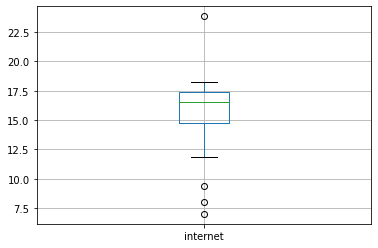

In [80]:
df_internet.boxplot()

Os usuários dos planos aparentam ter comportamentos parecidos/proporcionais em relação ao uso da internet. Os usuários dos 2 planos ultrapassam seus llimites disponíveis de internet, mas os clientes do plano surf ultrapassam muito mais que os do plano ultimate.

## Receita

In [81]:
df_usd = dados_gerais.pivot_table(index=['plan', 'month'], values='usd')
print(df_usd)

                      usd
plan     month           
surf     1      20.000000
         2      38.620000
         3      45.125000
         4      50.337143
         5      66.975472
         6      64.432857
         7      79.815730
         8      79.271429
         9      69.280952
         10     81.363536
         11     72.612385
         12     92.083333
ultimate 1      70.000000
         2      70.000000
         3      78.000000
         4      73.500000
         5      71.000000
         6      72.270270
         7      72.680851
         8      72.701754
         9      71.577465
         10     72.306818
         11     72.333333
         12     72.912000


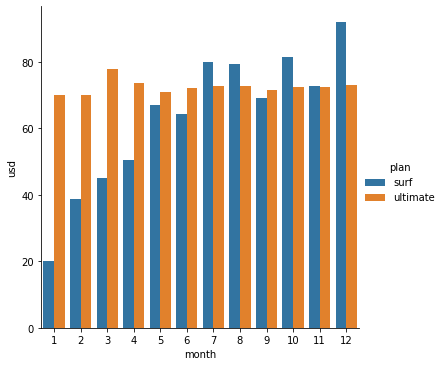

In [82]:
df_expl = df_usd['usd'].reset_index()
sns.catplot(x='month', y='usd', hue='plan', data=df_expl, kind='bar')

Em relação a receita vemos uma grande diferença entre os planos. Os usuários do plano ultimate não tem a média maior que 75, sendo que o valor do plano é 70, ou seja, não ultrapassam muito os limites disponíveis no plano. Pela análise feita vemos que os usuários desse plano só ultrapassaram os limites de internet(GB), os outros parâmetros não.

Já os usuários do plano surf tem médias muito maiores que os do plano ultimate, ou seja, ultrapassam muito os limites disponíveis no plano surf, em relação a todos os parâmetros, principalmente internet(GB). Sendo assim, os clientes que pagam mais de 70 no "surf", compensaria mudarem para o plano ultimate, mesmo que não utilizem tudo que é disponível no plano, pois não pagariam mais do que 70, em alguns casos.

<AxesSubplot:ylabel='Frequency'>

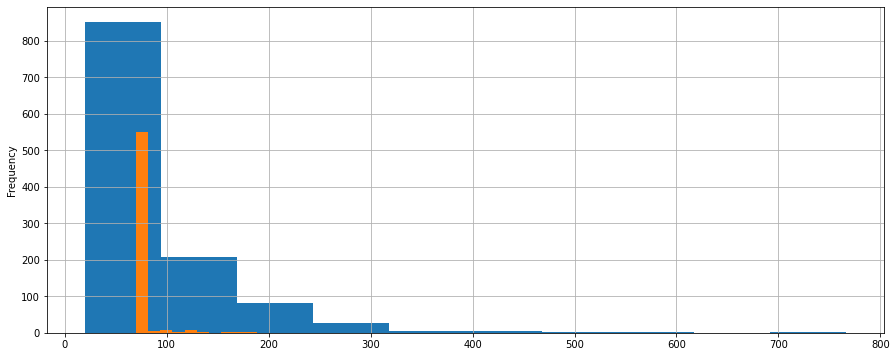

In [83]:
df_usd_surf = dados_gerais.query('plan == "surf"')
df_usd_ultimate = dados_gerais.query('plan == "ultimate"')
df_usd_surf['usd'].plot(kind='hist', figsize=(15,6), grid=True)
df_usd_ultimate['usd'].plot(kind='hist', figsize=(15,6), grid=True)

Como podemos ver, os usuários do plano surf, mais barato, são os que mais gastam. A grande maioria dos usuários do plano ultimate estão na casa dos $70. 

In [84]:
dados_gerais.query('usd > 20 and plan == "surf"').count() 

user_id     864
month       864
n_calls     864
internet    864
minutes     864
messages    864
plan        864
usd         864
dtype: int64

In [85]:
dados_gerais.query('plan == "surf"').count()

user_id     1180
month       1180
n_calls     1180
internet    1180
minutes     1180
messages    1180
plan        1180
usd         1180
dtype: int64

In [86]:
dados_gerais.query('usd > 70 and plan == "ultimate"').count()

user_id     34
month       34
n_calls     34
internet    34
minutes     34
messages    34
plan        34
usd         34
dtype: int64

In [87]:
dados_gerais.query('plan == "ultimate"').count()

user_id     579
month       579
n_calls     579
internet    579
minutes     579
messages    579
plan        579
usd         579
dtype: int64

Os usuários do plano ultimate são 579, e 34 ultrapassaram os $70, os mesmos 34 que ultrapassaram o limite da internet.

Os usuários do plano surf são 1180 e 864 ultrapassaram o limite de $20.

## Testar hipóteses estatísticas

Nula: A receita média dos usuários dos planos de chamadas Ultimate e Surf é igual.
Alternativa: contrária a nula, A receita média dos usuários dos planos de chamadas Ultimate e Surf é diferente.

In [88]:
surf = dados_gerais.query('plan == "surf"')
ultimate = dados_gerais.query('plan == "ultimate"')
surf_usd = surf['usd']
ultimate_usd = ultimate['usd']

Se as variâncias das populações estatísticas das quais as amostras são retiradas forem aproximadamente iguais equal_var=True; senão equal_var=False

In [89]:
surf_usd.describe()

count    1180.000000
mean       76.853305
std        72.268605
min        20.000000
25%        20.000000
50%        53.750000
75%       100.000000
max       766.300000
Name: usd, dtype: float64

In [90]:
#Variância surf
72.268605 * 72.268605

5222.751268646024

In [91]:
ultimate_usd.describe()

count    579.000000
mean      72.442142
std       11.825345
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      189.000000
Name: usd, dtype: float64

In [92]:
#Variância ultimate
11.825345 * 11.825345

139.838784369025

In [93]:
results = st.ttest_ind(surf_usd, ultimate_usd, equal_var=False)
print('p-value: ', results.pvalue)

p-value:  0.041375097781697706


In [94]:
alpha = 0.05
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós rejeitamos a hipótese nula


Rejeitamos a hipótese nula que a receita média dos usuários dos planos de chamadas Ultimate e Surf é igual, é diferente, sendo a do plano Surf a maior, mesmo sendo o plano mais barato, o que reforça a análise feita anteriormente.

In [95]:
dados_gerais.groupby('plan')['usd'].mean()

plan
surf        76.853305
ultimate    72.442142
Name: usd, dtype: float64

Nula: A receita média dos usuários da área de NY-NJ é igual dos usuários de outras regiões. Alternativa: contrária a nula, a receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.

In [96]:
users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Jacksonville, FL MSA                                1
Greensboro-High Point, NC MSA                       1
Albany-Schenectady-Troy, NY MSA                     1
El Paso, TX MSA                                     1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Name: city, Length: 73, dtype: int64

In [97]:
dados_city = users[['user_id', 'city']]
dados_city.head()

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"


Criei um dataframe só com as informações da cidade e usuário para juntar com o df dados_gerais, para testar a hipótese sobre as cidades.

In [98]:
dados_gerais = pd.merge(dados_gerais, dados_city, on='user_id', how='inner')
dados_gerais.head()

,user_id,month,n_calls,internet,minutes,messages,plan,usd,city
0,1000,12,16,2.0,117.0,11,ultimate,70.0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27,7.0,173.0,30,surf,20.0,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49,13.0,297.0,44,surf,20.0,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65,22.0,374.0,53,surf,90.9,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64,19.0,404.0,36,surf,60.0,"Seattle-Tacoma-Bellevue, WA MSA"


In [99]:
users_ny = dados_gerais.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
users_demais = dados_gerais.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [100]:
ny_usd = users_ny['usd']
demais_usd = users_demais['usd']

Se as variâncias das populações estatísticas das quais as amostras são retiradas forem aproximadamente iguais equal_var=True; senão equal_var=False

In [101]:
ny_usd.describe()

count    279.000000
mean      68.997491
std       50.629564
min       20.000000
25%       25.250000
50%       70.000000
75%       83.400000
max      406.800000
Name: usd, dtype: float64

In [102]:
#Variância ny
50.629564 * 50.629564

2563.3527508300963

In [103]:
demais_usd.describe()

count    1480.000000
mean       76.608514
std        61.091038
min        20.000000
25%        40.000000
50%        70.000000
75%        80.000000
max       766.300000
Name: usd, dtype: float64

In [104]:
#Variância demais regiões
61.091038 * 61.091038

3732.114923917444

In [105]:
results = st.ttest_ind(ny_usd, demais_usd, equal_var=False)
print('p-value: ', results.pvalue)

p-value:  0.02663475136496198


In [106]:
alpha = 0.05
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós rejeitamos a hipótese nula


In [107]:
print(users_ny['usd'].mean())
users_demais['usd'].mean()

68.99749103942652


76.60851351351351

Rejeitamos a hipótese nula que a receita média dos usuários da área de NY-NJ é igual da dos usuários das demais regiões, é diferente e menor, o que faz sentido já que a maioria dos dados analisados são das demais regiões (1480), enquanto 279 são da região NY-NJ.

## Conclusão geral

Iniciei carregando todas os DataFrames disponíveis.
Em seguida, o pré processamento dos dados, onde encontramos e tratamos valores ausentes e com tipos errados; não foram encontrados valores duplicados:

- No DataFrame 'plans' corrigi os tipos de dados das colunas 'usd_monthly_pay' e 'usd_per_gb', que deveriam ser do tipo float.
- No DataFrame 'users', a coluna 'churn_date' possuia muitos dados ausentes, com apenas 34 valores de 500, então excluí essa coluna, pois não afetaria minha análise. Também corrigi as colunas 'reg_date' e 'churn_date', que deveriam ser do tipo datetime.
- No DataFrame 'calls' corrigi a coluna 'call_date', que deveria ser do tipo datetime. Para atender as especificações, arredondei os segundos da coluna 'duration' para minutos.
- No DataFrame 'messages' corrigi a coluna 'message_date', que deveria ser do tipo datetime.
- No DataFrame 'internet' corrigi a coluna 'session_date' que deveria ser do tipo datetime.
- Para enriquecer os DataFrames e facilitar a análise, inclui a coluna 'month' nos DataFrames.

Em seguida criei dados agregados e os uni em um novo dataframe para facilitar a análise. Depois incluí as informações dos planos e calculei a receita de acordo com os valores de cada plano e os limites disponíveis que foram ultrapassados. Também arredondei 
os MB para GB. 


A partir disso, iniciei a análise do comportamento dos usuários dos dois planos e cheguei a conclusão: 
Em relação a receita vemos uma grande diferença entre os usuários dos planos. Os usuários do plano ultimate não tem a média maior que 75, sendo que o valor do plano é 70, ou seja, não ultrapassam muito os limites disponíveis no plano. Pela análise feita vemos que somente 34 usuários desse plano ultrapassaram os limites de internet(GB), os outros parâmetros não.

Já os usuários do plano surf tem médias de receita muito maiores que os do plano ultimate, ou seja, ultrapassam muito os limites disponíveis no plano surf, em relação a todos os parâmetros, principalmente internet(GB). Sendo assim, os clientes que pagam mais de 70 no "surf", compensaria mudarem para o plano ultimate, mesmo que não utilizem tudo que é disponível no plano, pois não pagariam mais do que 70, em alguns casos.

Para muitos clientes, o mais inteligente seria migrar para o plano ultimate. Para a empresa que oferece os planos, é mais rentável vender o plano surf, que por mais que seja mais barato, traz mais receita para a empresa.

Sobre as hipóteses testadas:
- A receita média dos usuários dos planos de chamadas Ultimate e Surf é diferente, sendo a do plano Surf a maior.
- A receita média dos usuários da área de NY-NJ difere da dos usuários das demais regiões, é menor, , o que faz sentido já que a maioria dos dados analisados são das demais regiões (1480 de 1759), enquanto 279 são da região NY-NJ.